In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import pysindy as ps
from matplotlib import pyplot as plt
import os

colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]


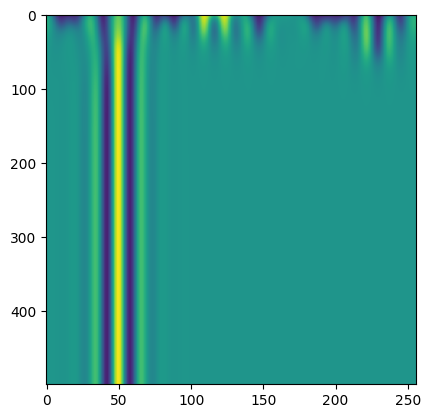

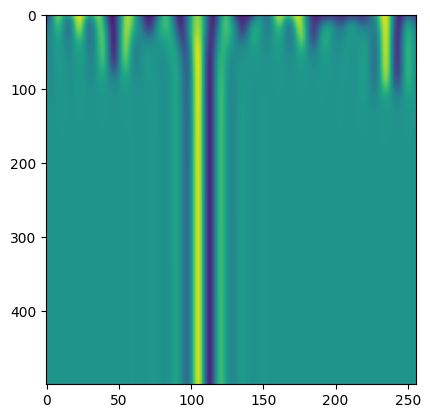

In [28]:
def sh_fit(t, u, r, d, e):
    ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
    uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
    uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
    uxxxx = np.real(ps.SpectralDerivative(d=4, axis=0)._differentiate(u, L / nx))
    return (
        - 2 * uxx
        -  uxxxx
        + (r - 1) * u
        + d * u**3
        - e  * u**5
    )


nx = 256
L = 2 * np.pi * 16
t1 = 50
N = nx
dt = 0.1

k = 2

xs_test = []
seeds=np.arange(20)
seeds=[4,9]
r=-0.65
for i in seeds:
    np.random.seed(i)
    ks = np.arange(-20, 21) / L
    u0 = np.zeros((nx), dtype=np.complex128)
    scale0 = 0.5
    for kx in ks:
        scale = scale0 / (1 + np.abs(L * kx) ** 0.5)
        u0 += (
            scale
            * (np.random.normal(0, 1) + 1j * np.random.normal(0, 1))
            * np.exp(1j * (2 * np.pi * kx * np.arange(nx) / nx * L))
        )
    u = np.real(u0)
    us = np.zeros((int(t1 / dt), nx))

    t = 0
    for n in range(int(t1 / dt)):
        t = n * dt
        print("%d %.3f" % (i, t / t1), end="\r")
        sol = solve_ivp(
            sh_fit,
            [t, t + dt],
            u,
            method="LSODA",
            args=(r,2,1),
            rtol=1e-6,
            atol=1e-6,
            first_step=dt / 100,
        )
        u = sol.y[:, -1]
        us[n] = u
    xs_test.append(np.transpose(us)[:, :, np.newaxis])
    plt.imshow(us,aspect=us.shape[1]/us.shape[0])
    plt.show()

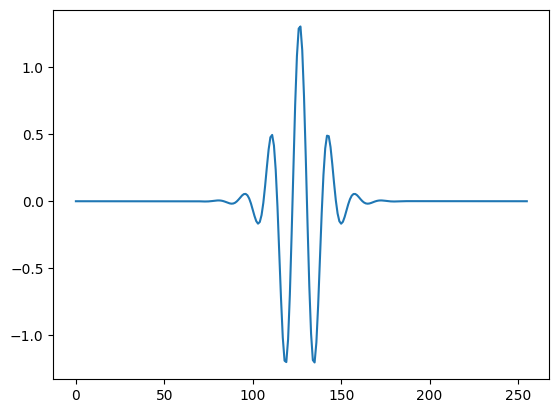

In [54]:
u=xs_test[0][:,-1]
ts=np.arange(0,N).reshape(-1,1)*L/N
u=np.roll(u,-1+128-np.argmax(u))
ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
plt.plot(u)
np.savetxt('cycle_even.dat',np.concatenate([ts,u,ux,uxx,uxxx],axis=1)[:nx//2])

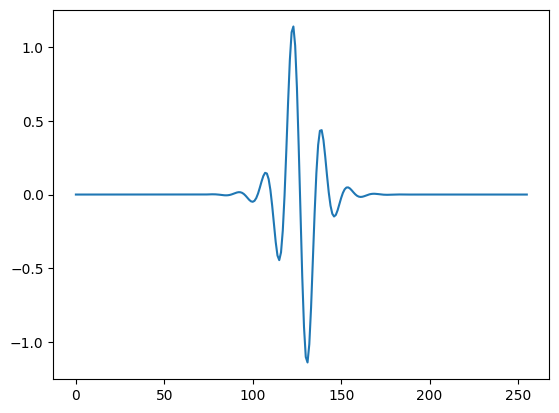

In [61]:
u=xs_test[1][:,-1]
ts=np.arange(0,N).reshape(-1,1)*L/N
u=np.roll(u,-1-4+128-np.argmax(u))
ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
plt.plot(u)
np.savetxt('cycle_odd.dat',np.concatenate([ts,u,ux,uxx,uxxx],axis=1)[:nx//2])

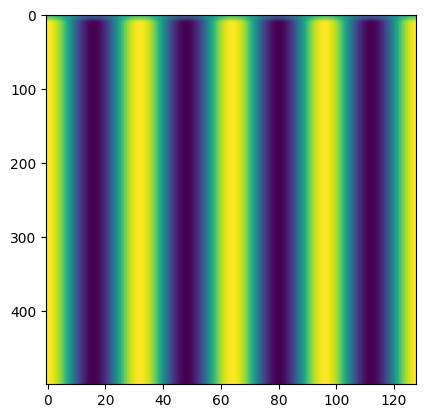

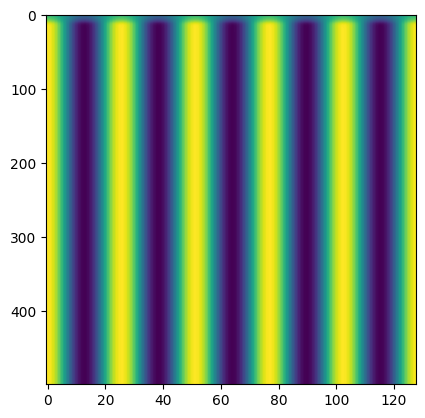

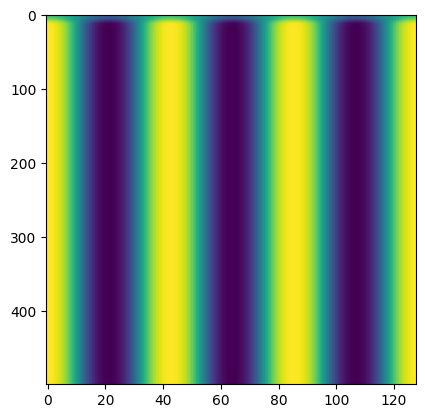

In [20]:
nx = 128
L = 2 * np.pi * 4
t1 = 50
N = nx
dt = 0.1

def sh_fit(t, u, r, d, e):
    ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
    uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
    uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
    uxxxx = np.real(ps.SpectralDerivative(d=4, axis=0)._differentiate(u, L / nx))
    return (
        - 2 * uxx
        -  uxxxx
        + (r - 1) * u
        + d * u**3
        - e  * u**5
    )

xs_test = []
r=0.5
ks=[4,5,3]

for k in ks:
    u0 = np.zeros((nx), dtype=np.complex128)
    scale0 = 0.5
    u0=scale0*np.cos(2*np.pi*k*np.arange(nx)/nx)
    u = np.real(u0)
    us = np.zeros((int(t1 / dt), nx))

    t = 0
    for n in range(int(t1 / dt)):
        t = n * dt
        print("%d %.3f" % (0, t / t1), end="\r")
        sol = solve_ivp(
            sh_fit,
            [t, t + dt],
            u,
            method="LSODA",
            args=(r,2,1),
            rtol=1e-6,
            atol=1e-6,
            first_step=dt / 100,
        )
        u = sol.y[:, -1]
        us[n] = u
    xs_test.append(np.transpose(us)[:, :, np.newaxis])
    plt.imshow(us,aspect=us.shape[1]/us.shape[0])
    plt.show()

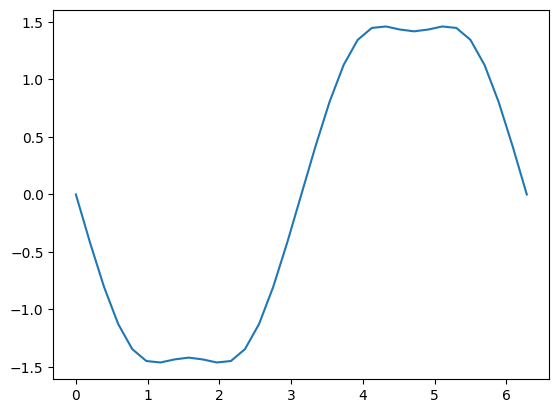

In [21]:
from scipy.signal import find_peaks

u=np.roll(xs_test[0][:,-1],16)
start,stop=find_peaks(u[:,0])[0][:2]
u=u[start:stop]
ts=np.arange(stop-start+1).reshape(-1,1)*L/nx
# ts=np.arange(stop-start+1).reshape(-1,1)/(stop-start)
u=np.roll(u,-np.argmin(np.abs(u)))
ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
u=np.concatenate([u,[u[0]]])
ux=np.concatenate([ux,[ux[0]]])
uxx=np.concatenate([uxx,[uxx[0]]])
uxxx=np.concatenate([uxxx,[uxxx[0]]])
plt.plot(ts,uxx)
np.savetxt('periodic.dat',np.concatenate([ts,u,ux,uxx,uxxx],axis=1))

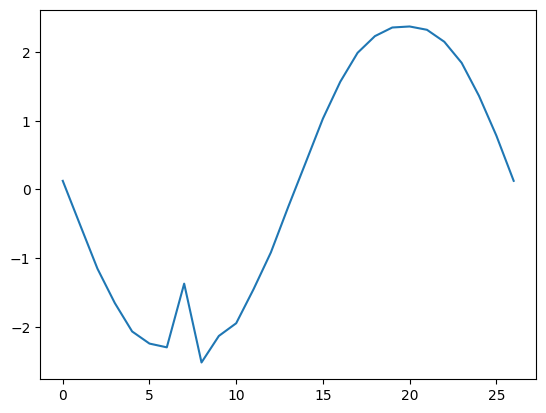

In [22]:
from scipy.signal import find_peaks

u=np.roll(xs_test[1][:,-1],16)
start,stop=find_peaks(u[:,0])[0][:2]
u=u[start:stop]
ts=np.arange(stop-start+1).reshape(-1,1)*L/nx
u=np.roll(u,-np.argmin(np.abs(u)))
ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
u=np.concatenate([u,[u[0]]])
ux=np.concatenate([ux,[ux[0]]])
uxx=np.concatenate([uxx,[uxx[0]]])
uxxx=np.concatenate([uxxx,[uxxx[0]]])
plt.plot(uxx)
np.savetxt('periodic2.dat',np.concatenate([ts,u,ux,uxx,uxxx],axis=1))

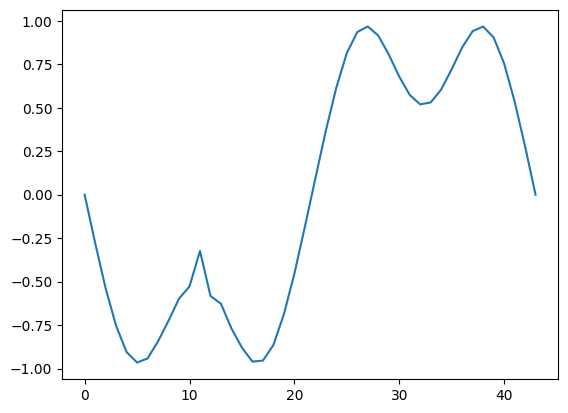

In [23]:
from scipy.signal import find_peaks

u=np.roll(xs_test[2][:,-1],16)
start,stop=find_peaks(u[:,0])[0][:2]
u=u[start:stop]
ts=np.arange(stop-start+1).reshape(-1,1)*L/nx
u=np.roll(u,-np.argmin(np.abs(u)))
ux = np.real(ps.SpectralDerivative(d=1, axis=0)._differentiate(u, L / nx))
uxx = np.real(ps.SpectralDerivative(d=2, axis=0)._differentiate(u, L / nx))
uxxx = np.real(ps.SpectralDerivative(d=3, axis=0)._differentiate(u, L / nx))
u=np.concatenate([u,[u[0]]])
ux=np.concatenate([ux,[ux[0]]])
uxx=np.concatenate([uxx,[uxx[0]]])
uxxx=np.concatenate([uxxx,[uxxx[0]]])
plt.plot(uxx)
np.savetxt('periodic3.dat',np.concatenate([ts,u,ux,uxx,uxxx],axis=1))

Text(0, 0.5, '$|u|$')

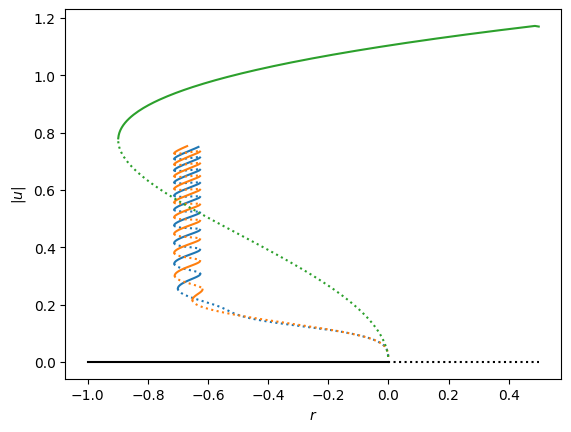

In [6]:
def get_auto_branches(filebase):
    i = 0
    unstable = []
    while os.path.exists(filebase + "/unstable_" + str(i) + ".npy"):
        unstable.append(np.load(filebase + "/unstable_" + str(i) + ".npy"))
        i = i + 1

    i = 0
    stable = []
    while os.path.exists(filebase + "/stable_" + str(i) + ".npy"):
        stable.append(np.load(filebase + "/stable_" + str(i) + ".npy"))
        i = i + 1
    return unstable, stable


unstable,stable=get_auto_branches('even')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[0])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[0])

unstable,stable=get_auto_branches('odd')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[1])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[1])

unstable,stable=get_auto_branches('periodic')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[2])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[2])

plt.plot([-1,0],[0,0],c='black',ls='-')
plt.plot([0,0.5],[0,0],c='black',ls=':')
plt.xlabel('$r$')
plt.ylabel('$|u|$')

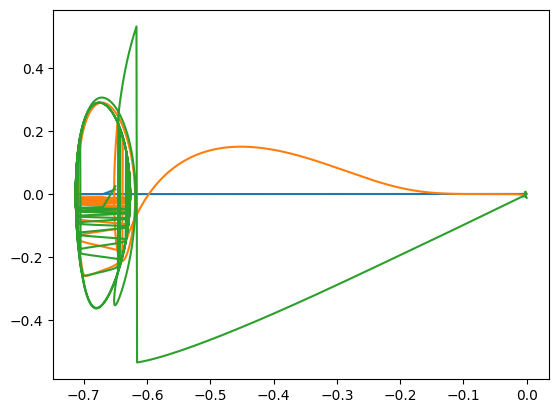

In [5]:
sols = np.load("odd_sols.npy")
pars = np.load("odd_pars.npy")
evals=np.load('odd_evals.npy')
plt.plot(pars[:,0],np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,0]])]))
plt.plot(pars[:,0],np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,1]])]))
plt.plot(pars[:,0],np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,2]])]))

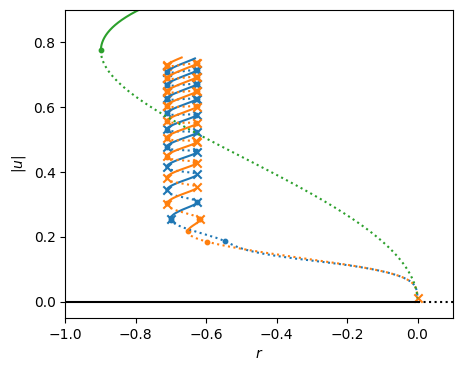

In [147]:
def get_auto_branches(filebase):
    i = 0
    unstable = []
    while os.path.exists(filebase + "/unstable_" + str(i) + ".npy"):
        unstable.append(np.load(filebase + "/unstable_" + str(i) + ".npy"))
        i = i + 1

    i = 0
    stable = []
    while os.path.exists(filebase + "/stable_" + str(i) + ".npy"):
        stable.append(np.load(filebase + "/stable_" + str(i) + ".npy"))
        i = i + 1
    return unstable, stable

plt.figure(figsize=(5,4))

unstable,stable=get_auto_branches('even')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[0])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[0])

sols = np.load("even_sols.npy")
pars = np.load("even_pars.npy")
evals=np.load('even_evals.npy')
    
lambda1=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,1]])])
lambda2=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,2]])])
br=np.concatenate([pars,lambda1.reshape(-1,1),lambda2.reshape(-1,1)],axis=1)

smallinds=np.where(np.abs(br[:,5])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
lpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,5]))!=0)[0]
    lpsinds=lpsinds+[smallinds[jumps[j]+inds]]
lpsinds=np.concatenate(lpsinds)

smallinds=np.where(np.abs(br[:,6])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
sbpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,6]))!=0)[0]
    sbpsinds=sbpsinds+[smallinds[jumps[j]+inds]]
sbpsinds=np.concatenate(sbpsinds)
lpsinds=np.setdiff1d(lpsinds,sbpsinds)

lps=br[lpsinds]
sbps=br[sbpsinds]

plt.scatter(lps[:,0],lps[:,4],s=10,c=colors[0])
plt.scatter(sbps[:,0],sbps[:,4],marker='x',c=colors[0])


unstable,stable=get_auto_branches('odd')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[1])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[1])

sols = np.load("odd_sols.npy")
pars = np.load("odd_pars.npy")
evals=np.load('odd_evals.npy')
    
lambda1=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,1]])])
lambda2=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,2]])])
br=np.concatenate([pars,lambda1.reshape(-1,1),lambda2.reshape(-1,1)],axis=1)

smallinds=np.where(np.abs(br[:,5])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
lpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,5]))!=0)[0]
    lpsinds=lpsinds+[smallinds[jumps[j]+inds]]
lpsinds=np.concatenate(lpsinds)

smallinds=np.where(np.abs(br[:,6])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
sbpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,6]))!=0)[0]
    sbpsinds=sbpsinds+[smallinds[jumps[j]+inds]]
sbpsinds=np.concatenate(sbpsinds)
lpsinds=np.setdiff1d(lpsinds,sbpsinds)

lps=br[lpsinds]
sbps=br[sbpsinds]

plt.scatter(lps[:,0],lps[:,4],s=10,c=colors[1])
plt.scatter(sbps[:,0],sbps[:,4],marker='x',c=colors[1])
    

unstable,stable=get_auto_branches('periodic')
for branch in stable:
    plt.plot(branch[0],branch[1], c=colors[2])
for branch in unstable:
    plt.plot(branch[0], branch[1], ls=":", c=colors[2])
    
sols = np.load("periodic_sols.npy")
pars = np.load("periodic_pars.npy")
evals=np.load('periodic_evals.npy')
    
lambda1=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,1]])])
lambda2=np.real(np.array(evals)[tuple([np.arange(len(evals)),np.argsort(np.abs(evals),axis=1)[:,2]])])
br=np.concatenate([pars,lambda1.reshape(-1,1),lambda2.reshape(-1,1)],axis=1)

smallinds=np.where(np.abs(br[:,5])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
lpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,5]))!=0)[0]
    lpsinds=lpsinds+[smallinds[jumps[j]+inds]]
lpsinds=np.concatenate(lpsinds)

smallinds=np.where(np.abs(br[:,6])<0.1)[0]
jumps=np.where(np.diff(smallinds)>1)[0]
cuts=np.zeros(2+2*len(jumps),dtype=int)
cuts[1:-1:2]=jumps
cuts[2:-1:2]=jumps+1
smallbranches=[]
for j in range(0,len(cuts),2):
    smallbranches=smallbranches+[br[smallinds[cuts[j]:cuts[j+1]]]]

jumps=[-1]+jumps.tolist()
sbpsinds=[]
for j,smallbr in enumerate(smallbranches):
    inds=np.where(np.diff(np.sign(smallbr[:,6]))!=0)[0]
    sbpsinds=sbpsinds+[smallinds[jumps[j]+inds]]
sbpsinds=np.concatenate(sbpsinds)
lpsinds=np.setdiff1d(lpsinds,sbpsinds)

lps=br[lpsinds]
sbps=br[sbpsinds]

plt.scatter(lps[:,0],lps[:,4],s=10,c=colors[2])
plt.scatter(sbps[:,0],sbps[:,4],marker='x',c=colors[2])
    

plt.plot([-1,0],[0,0],c='black',ls='-')
plt.plot([0,0.5],[0,0],c='black',ls=':')

plt.xlim(-1,0.1)
plt.ylim(-0.05,0.9)
plt.xlabel('$r$')
plt.ylabel('$|u|$')

plt.savefig('sh.pdf')
plt.show()